In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from src.config import INPUT_PATH, OUTPUT_PATH

In [3]:
charge_sums = []

file_list = list((INPUT_PATH / "train").glob("batch_*.parquet"))

for f in tqdm(file_list):
    df = pd.read_parquet(f)
    
    df_gb = df.groupby("event_id")[["charge"]].sum()
    charge_sums.append(df_gb)

  0%|          | 0/660 [00:00<?, ?it/s]

In [4]:
charge_sums = pd.concat(charge_sums).sort_values(by="event_id")
charge_sums

,charge
event_id,
24,60.475
41,46.275
59,33.200
67,131.750
72,55.750
...,...
2147483597,118.450
2147483603,28.700
2147483617,36.525


In [5]:
charge_sums.to_parquet(INPUT_PATH / "charge_sums.parquet")

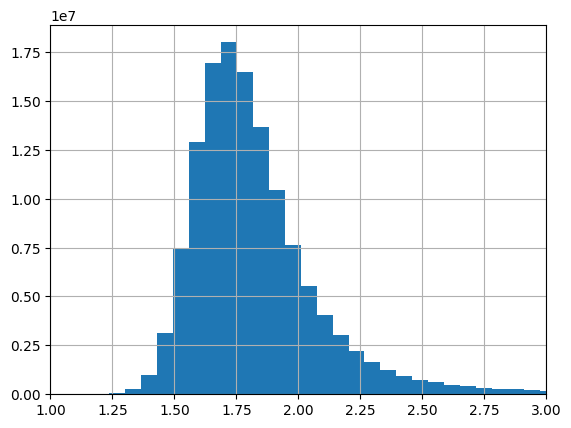

In [8]:
ax = np.log10(charge_sums["charge"]).hist(bins=100)
ax.set_xlim((1, 3));